# Analysis of trial-based photometry data

This notebook illustrates a pipeline for pre-processing and analysing fiber photometry data from behavioural tasks with a discrete trial structure.  The repository contains python modules for preprocessing and analysing the data, as well as example data consisting of 5 sessions each from 9 subjects perfoming a probabilistic reversal learning task, with dLight photometry recordings in the dorsolateral striatum.  The experiment was run using [pyControl](https://pycontrol.readthedocs.io) to implement the behavioural task and [pyPhotometry](https://pyphotometry.readthedocs.io) to aquire the photometry signals.  The repository structure is:

```
photometry_analysis_repository
├── photometry_analysis.ipynb  # This notebook.
├── code                       # Folder containing modules used in the analysis pipepine.
├── data
    ├── raw                    
        ├── pyControl          # Behavioural data generated by pyControl
        ├── photometry         # Photometry data generated by pyPhotometry         
```
# Pre-processing

The first stage of the analysis pipeline is preprocessing the data to change it from the raw output of the acqusition systems into a format that is convinient to work with.

In [2]:
# Imports
from pathlib import Path
import code.preprocess_data as pp
import code.analysis as an

# Paths
raw_data_dir = Path("data", "raw")              # Folder where the raw data is located.
processed_data_dir = Path("data", "processed")  # Folder where the processed data will be saved.
analysis_data_dir = Path("data", "analysis")    # Folder where analysis data will be saved.
plots_dir = Path("plots")                       # Path where plots will be saved.

In [ ]:
trial_events = {
        "initiation": ("choice_state", "forced_choice_left", "forced_choice_right"),
        "choice": ("chose_left", "chose_right"),
        "outcome": ("reward_left", "reward_right", "no_reward"),
    }

pp.preprocess_data(raw_data_dir, processed_data_dir, plots_dir, trial_events)

# Make analysis data

In [ ]:
sessions = an.load_sessions(processed_data_dir)
                            
median_trial_times = an.get_median_trial_times(
    sessions, trial_events=["initiation", "choice"], save_dir=analysis_data_dir)

an.save_aligned_signals(
    sessions, analysis_data_dir, trial_events=["initiation", "choice"],target_event_times=median_trial_times)

# Run analyses

In [ ]:
sessions = an.load_sessions(processed_data_dir) # Reload the sessions, now including the aligned signals.

sessions_df = an.make_analysis_dataframe(sessions) # Make a dataframe containing data from all sessions.

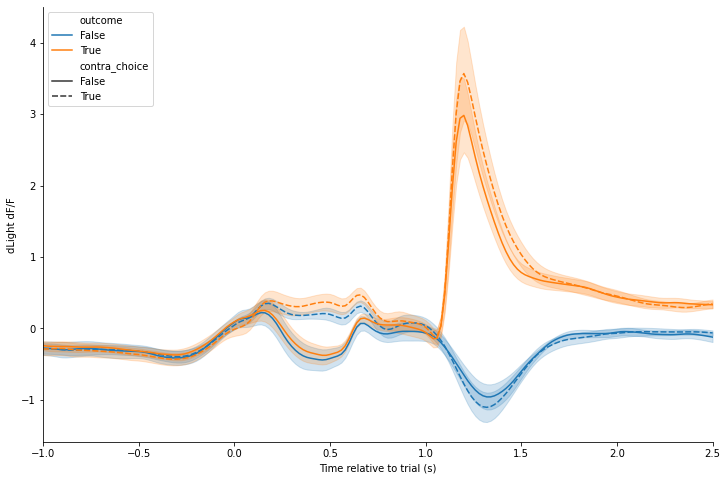

In [30]:
an.plot_response(sessions_df, alignment="trial", hue="outcome", style="contra_choice")

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.10it/s]


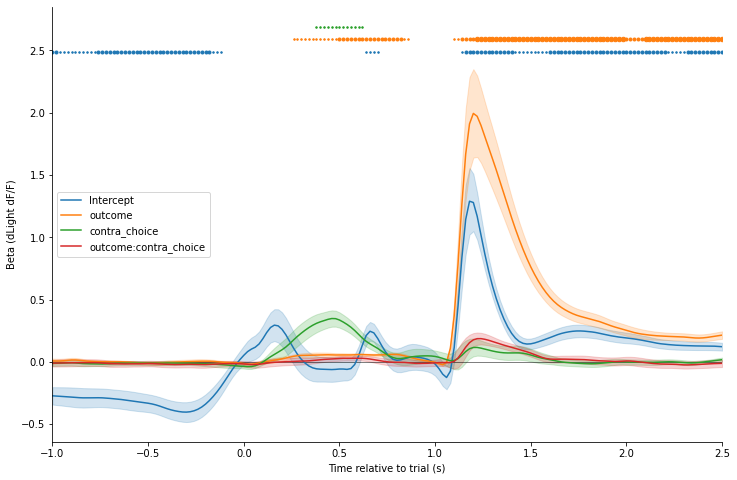

In [34]:
an.regression_analysis(sessions_df, formula="outcome*contra_choice", alignment="trial")